In [21]:
!pip install qiskit
!pip install qiskit_aer
!pip install cirq
!pip install matplotlib
!pip install numpy

# Understanding Random Number Generation and Superposition using Qiskit and Cirq
A step by step explanation of one of the most crucial quantum computing concepts.

In [16]:
from qiskit import QuantumCircuit #for initialising quantum circuits and Hadamand gate
from qiskit_aer import QasmSimulator #used for simulating random bits for the quantum circuit
import matplotlib.pyplot as plt



> What is a Hadamard Gate?

The Hadamard gate (often denoted as H) is a single-qubit quantum gate, similar to how AND, OR, NOT are applied to conventional computing gates.

It's based on the concept of flipping a coin in the quantum world.
When applied to a qubit in the standard basis state |0⟩, it transforms it into a superposition state (|0⟩ + |1⟩) / sqrt(2).
When applied to a qubit in the standard basis state |1⟩, it transforms it into a superposition state (|0⟩ - |1⟩) / sqrt(2).

In simpler terms, it puts the qubit into a state where it has an equal
probability(50/50) of being measured as 0 or 1.




>Why is it used in this program?


The core idea of this quantum random number generator is to leverage the inherent randomness of quantum mechanics.
By applying the Hadamard gate to a qubit that starts in a known state (like |0⟩), the program puts the qubit into a superposition.
In this superposition state, the qubit is not definitively 0 or 1. It's in a probabilistic combination of both.

When the program then measures the qubit (using the measure operation), the superposition collapses, and the outcome is randomly determined to be either 0 or 1 with a 50% probability for each.
This measurement process, following the application of the Hadamard gate, is the source of the true quantum randomness that the program generates.




Random Bits: [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
As Integer: 7605
As Hex: 0x1db5


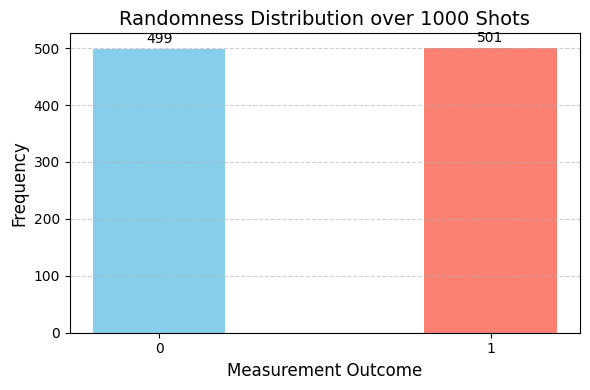

In [17]:


# STEP 1: Defining the quantum circuit

# Apply Hadamard gate to put the qubit into a superposition
# Measure the result into the classical bit

def create_rng_circuit():
    qc = QuantumCircuit(1, 1) # 1 qubit + 1 classical bit
    qc.h(0)            # Hadamard gate creates equal superposition
    qc.measure(0, 0)   # Collapses to |0⟩ or |1⟩ randomly
    return qc

# STEP 2: Generate a single random bit
# - Run the circuit with 1 shot
# - Use QasmSimulator to simulate measurement

def generate_random_bit():
    qc = create_rng_circuit()
    simulator = QasmSimulator()
    job = simulator.run(qc, shots=1)
    result = job.result()
    counts = result.get_counts()
    return int(list(counts.keys())[0])  # Extract 0 or 1 from result

# STEP 3: Generate multiple random bits
# - Run the above circuit repeatedly for `n` bits

def generate_random_bits(n):
    return [generate_random_bit() for _ in range(n)]

# STEP 4: Visualize output distribution for many samples
# - Run the same quantum circuit `shots` times
# - Use matplotlib to create a customized bar chart of counts

def visualize_rng_distribution(shots=1000):
    qc = create_rng_circuit()
    simulator = QasmSimulator()
    job = simulator.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(counts.keys(), counts.values(), width=0.4, color=['skyblue', 'salmon'])

    ax.set_title(f"Randomness Distribution over {shots} Shots", fontsize=14)
    ax.set_xlabel("Measurement Outcome", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6, axis='y')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{int(yval)}',
                ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# PRACTICAL APPLICATION
# ----------------------
# This kind of RNG is based on true quantum randomness.
# Useful in applications like:
# - Cryptography (e.g., quantum key generation)
# - Probabilistic simulations
# - Fair lotteries or games
# - Randomized algorithms

if __name__ == '__main__':
    # Generate and display 16 random bits
    bits = generate_random_bits(16)
    print("Random Bits:", bits)

    # Convert to integer and hex for practical use
    as_integer = int("".join(map(str, bits)), 2)
    print("As Integer:", as_integer)
    print("As Hex:", hex(as_integer))

    # Visualize the distribution across many runs
    visualize_rng_distribution()

Random Bits: [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
As Integer: 49696
As Hex: 0xc220


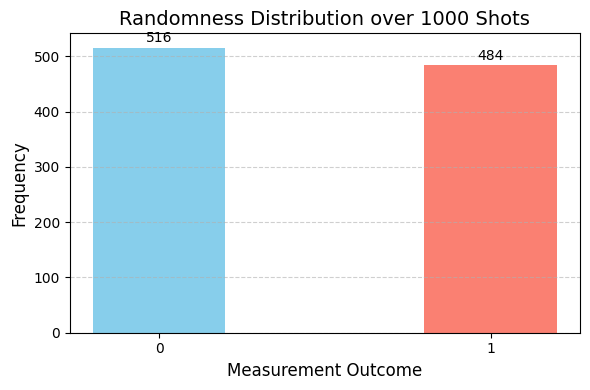

In [18]:
# Quantum RNG using Cirq – Step-by-Step Version

import cirq
import matplotlib.pyplot as plt
from collections import Counter

# STEP 1: Define the quantum circuit
# - 1 qubit + measurement gate
# - Apply Hadamard gate to put the qubit into a superposition

def create_rng_circuit():
    qubit = cirq.LineQubit(0)
    circuit = cirq.Circuit()
    circuit.append(cirq.H(qubit))      # Hadamard gate
    circuit.append(cirq.measure(qubit, key='m'))  # Measure into classical register
    return circuit, qubit

# STEP 2: Generate a single random bit using Cirq's simulator

def generate_random_bit():
    circuit, _ = create_rng_circuit()
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1)
    return int(result.measurements['m'][0][0])

# STEP 3: Generate multiple random bits

def generate_random_bits(n):
    return [generate_random_bit() for _ in range(n)]

# STEP 4: Visualize output distribution for many samples

def visualize_rng_distribution(shots=1000):
    circuit, _ = create_rng_circuit()
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=shots)
    measurements = result.measurements['m'][:,0]  # Extract bit values
    counts = Counter(measurements)

    # Convert keys to strings for consistent labeling
    counts_str = {str(k): v for k, v in counts.items()}

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(counts_str.keys(), counts_str.values(), width=0.4, color=['skyblue', 'salmon'])

    ax.set_title(f"Randomness Distribution over {shots} Shots", fontsize=14)
    ax.set_xlabel("Measurement Outcome", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6, axis='y')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{int(yval)}',
                ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# PRACTICAL APPLICATION
# ----------------------
# This RNG uses quantum principles via Cirq
# Applications:
# - Quantum-secure encryption
# - Fair randomness for simulations and games
# - Monte Carlo & probabilistic methods

if __name__ == '__main__':
    bits = generate_random_bits(16)
    print("Random Bits:", bits)

    as_integer = int("".join(map(str, bits)), 2)
    print("As Integer:", as_integer)
    print("As Hex:", hex(as_integer))

    visualize_rng_distribution()



Random Bitstrings: [[np.int8(0), np.int8(1), np.int8(1), np.int8(0)], [np.int8(1), np.int8(0), np.int8(1), np.int8(0)], [np.int8(0), np.int8(1), np.int8(0), np.int8(0)], [np.int8(0), np.int8(1), np.int8(1), np.int8(0)], [np.int8(0), np.int8(1), np.int8(1), np.int8(0)], [np.int8(1), np.int8(1), np.int8(1), np.int8(1)], [np.int8(1), np.int8(1), np.int8(1), np.int8(1)], [np.int8(1), np.int8(1), np.int8(0), np.int8(0)]]
As Integer: 6
As Hex: 0x6


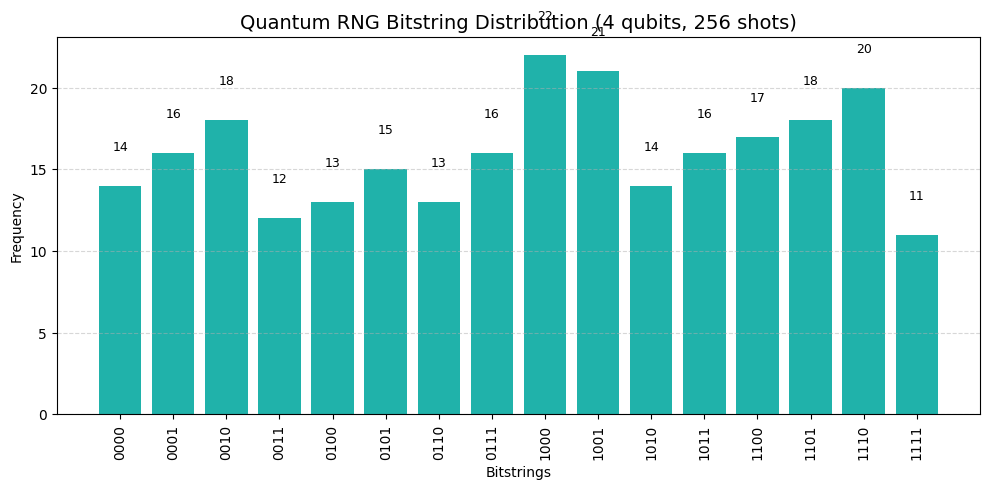

In [22]:
import numpy as np # Uncommented numpy import
# STEP 1: Define a quantum circuit that creates superpositions on multiple qubits
def create_rng_circuit(n_qubits):
    qubits = [cirq.LineQubit(i) for i in range(n_qubits)]
    circuit = cirq.Circuit()
    for q in qubits:
        circuit.append(cirq.H(q))
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit, qubits

# STEP 2: Generate a single random bitstring from n qubits
def generate_random_bitstring(n_qubits):
    circuit, qubits = create_rng_circuit(n_qubits)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1)
    bits = result.measurements['result'][0]  # Single measurement
    return list(bits)

# STEP 3: Generate multiple random bitstrings
def generate_random_bitstrings(n_qubits, count):
    results = []
    for _ in range(count):
        results.append(generate_random_bitstring(n_qubits))
    return results

# STEP 4: Visualize bit frequency distribution
def visualize_rng_distribution(n_qubits, shots=1000):
    circuit, qubits = create_rng_circuit(n_qubits)
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=shots)
    measurements = result.measurements['result']

    # Convert each measurement to string
    bitstrings = ["".join(map(str, reversed(bits))) for bits in measurements]
    unique, counts = np.unique(bitstrings, return_counts=True)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(unique, counts, color='lightseagreen')
    ax.set_title(f"Quantum RNG Bitstring Distribution ({n_qubits} qubits, {shots} shots)", fontsize=14)
    ax.set_xlabel("Bitstrings")
    ax.set_ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.5, axis='y')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 2, f'{int(yval)}',
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# PRACTICAL APPLICATIONS
# - Multi-bit true randomness for secure keys
# - Input for parallelized quantum simulations or random tests

if __name__ == '__main__':
    n_qubits = 4
    num_bitstrings = 8
    bitstrings = generate_random_bitstrings(n_qubits, num_bitstrings)
    print("Random Bitstrings:", bitstrings)

    # Convert one to integer and hex as an example
    bit_str = "".join(map(str, bitstrings[0]))
    print("As Integer:", int(bit_str, 2))
    print("As Hex:", hex(int(bit_str, 2)))

    visualize_rng_distribution(n_qubits=n_qubits, shots=256)